In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')

In [3]:
df.head(8)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765


In [4]:
df=df.drop(columns=['sex'])
df.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,Prof,B,19,18,139750
1,Prof,B,20,16,173200
2,AsstProf,B,4,3,79750
3,Prof,B,45,39,115000
4,Prof,B,40,41,141500


In [5]:
df=df.drop(columns=['rank'])
df.head()

,discipline,yrs.since.phd,yrs.service,salary
0,B,19,18,139750
1,B,20,16,173200
2,B,4,3,79750
3,B,45,39,115000
4,B,40,41,141500


In [6]:
df=df.drop(columns=['discipline'])
df.head()

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500


In [7]:
df.tail(4)

,yrs.since.phd,yrs.service,salary
393,31,19,150564
394,42,25,101738
395,25,15,95329
396,8,4,81035


In [8]:
df.sample()

,yrs.since.phd,yrs.service,salary
277,31,27,163200


In [9]:
#indexes at axis=1
type(df.columns)

pandas.core.indexes.base.Index

In [10]:
df.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [11]:
int(True)

1

In [12]:
int(False)

0

In [13]:
df.isnull().sum()

yrs.since.phd    0
yrs.service      0
salary           0
dtype: int64

In [14]:
#categorical column ==> mode
#continious columns == > mean

In [15]:
#df.fillna()

In [16]:
df.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

# EDA(Exploratory data analysis)

# Scatterplot:

In [17]:
import seaborn as sns

<AxesSubplot:>

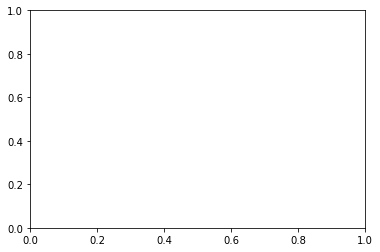

In [18]:
sns.scatterplot()


<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

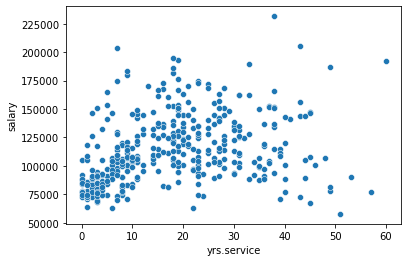

In [21]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

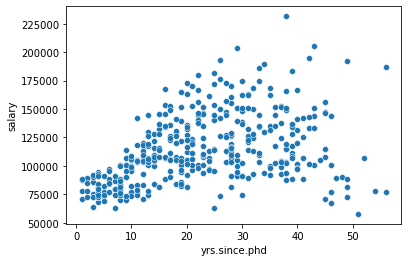

In [22]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

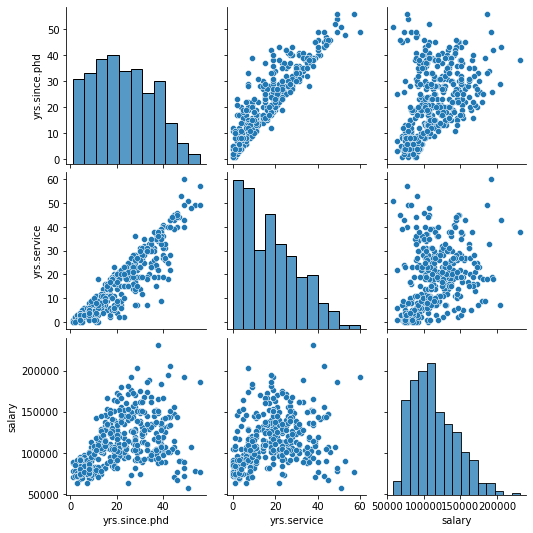

In [23]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot2.png')
plt.show()

# correlation:

In [24]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [25]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

correlation using heatmap:

<AxesSubplot:>

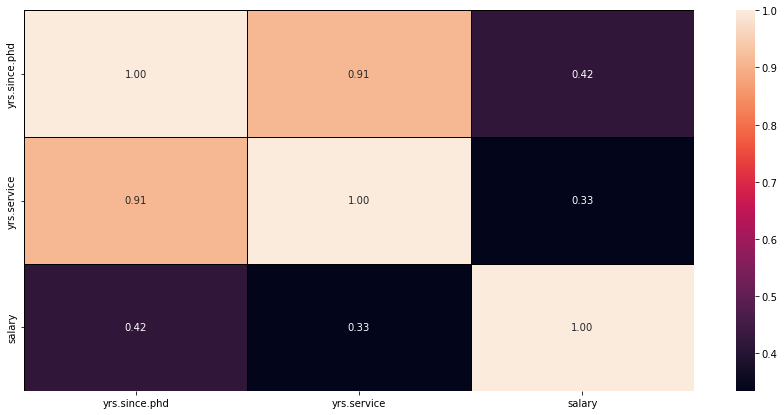

In [26]:
import matplotlib.pyplot as plt

# size of canvas
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(),annot=True, linewidth=0.5,linecolor="black",fmt='.2f')

# Descriptive statistics


# Describing Datasates:

In [27]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


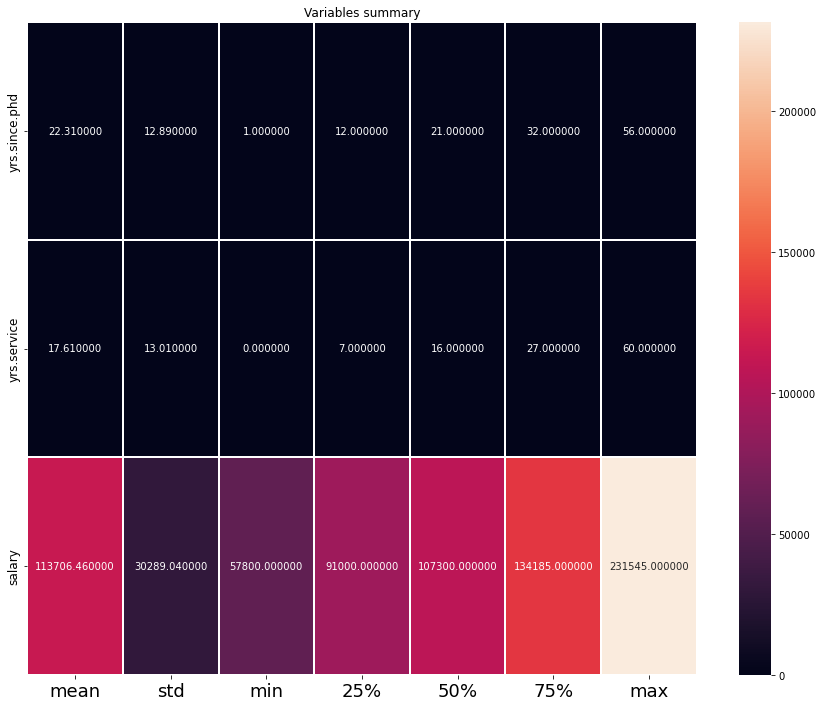

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.savefig('heatmap.png')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   yrs.since.phd  397 non-null    int64
 1   yrs.service    397 non-null    int64
 2   salary         397 non-null    int64
dtypes: int64(3)
memory usage: 9.4 KB


# Outliers checking

In [30]:
import warnings
warnings.filterwarnings('ignore')


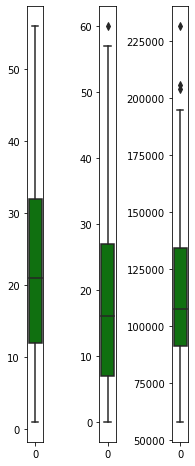

In [31]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# skewness

In [32]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

+/- 0.65 skewness threshold ia taken

# NORMAL DISTRIBUTION CURVE:

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

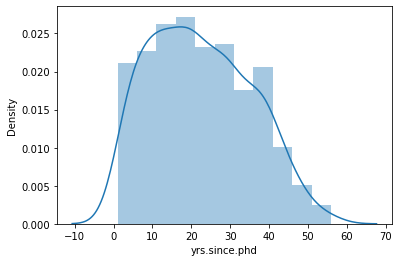

In [33]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

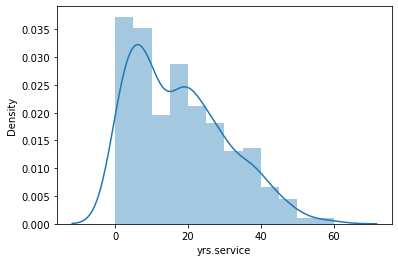

In [34]:
sns.distplot(df["yrs.service"])

# The normal distribution shows that data is skwewd

# Data Cleaning 

In [35]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

In [36]:
df

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


# Removing outliers:

IQR proximity rule

Z-score Technique


In [37]:
np.abs(2)

2

In [38]:
np.abs(-2)

2

In [39]:

from scipy.stats import zscore

In [40]:
np.abs(zscore(df))

,yrs.since.phd,yrs.service,salary
0,0.257550,0.029669,0.860919
1,0.179854,0.124300,1.966672
2,1.422982,1.125098,1.122495
3,1.762533,1.646343,0.042760
4,1.374055,1.800312,0.918768
...,...,...,...
392,0.830187,0.953483,0.350418
393,0.674796,0.106654,1.218396
394,1.529446,0.568560,0.395640
395,0.208623,0.201284,0.607502


In [41]:
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 3)

In [42]:
z

,yrs.since.phd,yrs.service,salary
0,0.257550,0.029669,0.860919
1,0.179854,0.124300,1.966672
2,1.422982,1.125098,1.122495
3,1.762533,1.646343,0.042760
4,1.374055,1.800312,0.918768
...,...,...,...
392,0.830187,0.953483,0.350418
393,0.674796,0.106654,1.218396
394,1.529446,0.568560,0.395640
395,0.208623,0.201284,0.607502


In [43]:
#if np.abs is not applied
#threshold=(-3,3)



# if applied np.abs

threshold=3  #(standard)
#index number
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([2, 1, 1, 2], dtype=int64))


In [44]:
len(np.where(z>3)[0])

4

numpy
row wise   axis=1
column wise------axis=0

pandas

row wise-----axis=0
column wise------axis=1

In [45]:
df_new=df[(z<3).all(axis=1)]

In [46]:
print("old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows", df.shape[0]- df_new.shape[0])


old Dataframe (397, 3)
New Dataframe (393, 3)
total_dropped_rows 4


# percentage data loss

In [47]:
loss_percent=(397-393)/397*100
print(loss_percent,'%')

1.0075566750629723 %


# Model without outliers is df and model with desired outliers if df_new1

In [48]:
df_new

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [49]:
# independent column
x= df_new.drop(columns=['salary'])

In [50]:
#target
y=df_new['salary']

# Transforming data to remove skewness:

In [51]:
from sklearn.preprocessing import power_transform

In [52]:
x=power_transform(x,method='yeo-johnson')

In [53]:
type(x)

numpy.ndarray

In [54]:
x

array([[-0.11344983,  0.26888583],
       [-0.03455335,  0.1209006 ],
       [-1.6242611 , -1.28449532],
       [ 1.59976363,  1.46109915],
       [ 1.31028198,  1.55315864],
       [-1.36187943, -0.84005312],
       [ 0.68342795,  0.60337981],
       [ 1.59976363,  1.72997607],
       [ 0.04281072,  0.40814245],
       [-0.19398811,  0.26888583],
       [-0.72000082, -0.60348074],
       [-1.24247753, -1.47508922],
       [-2.12374282, -1.70716059],
       [-1.93539178, -2.02223253],
       [-0.03455335,  0.26888583],
       [-0.72000082, -1.28449532],
       [-0.11344983,  0.40814245],
       [ 1.1904517 ,  1.21866709],
       [ 1.12958897,  0.60337981],
       [ 1.25067523,  1.31789249],
       [ 0.74953316,  0.78500622],
       [ 1.06806314,  1.06349813],
       [ 0.94291868,  1.00992197],
       [ 0.26663401,  0.33951754],
       [-0.62629143, -0.60348074],
       [ 0.04281072, -0.60348074],
       [ 1.00584876,  0.60337981],
       [-1.48854554, -1.28449532],
       [-0.81672914,

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.11344983,  0.26888583],
       [-0.03455335,  0.1209006 ],
       [-1.6242611 , -1.28449532],
       [ 1.59976363,  1.46109915],
       [ 1.31028198,  1.55315864],
       [-1.36187943, -0.84005312],
       [ 0.68342795,  0.60337981],
       [ 1.59976363,  1.72997607],
       [ 0.04281072,  0.40814245],
       [-0.19398811,  0.26888583],
       [-0.72000082, -0.60348074],
       [-1.24247753, -1.47508922],
       [-2.12374282, -1.70716059],
       [-1.93539178, -2.02223253],
       [-0.03455335,  0.26888583],
       [-0.72000082, -1.28449532],
       [-0.11344983,  0.40814245],
       [ 1.1904517 ,  1.21866709],
       [ 1.12958897,  0.60337981],
       [ 1.25067523,  1.31789249],
       [ 0.74953316,  0.78500622],
       [ 1.06806314,  1.06349813],
       [ 0.94291868,  1.00992197],
       [ 0.26663401,  0.33951754],
       [-0.62629143, -0.60348074],
       [ 0.04281072, -0.60348074],
       [ 1.00584876,  0.60337981],
       [-1.48854554, -1.28449532],
       [-0.81672914,

In [56]:
x.mean()

3.6159935662091615e-17

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

# Splitting the dataframe

In [58]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),'\n\n')

At random state 51 The model performs very well
At random_state:- 51
Training accuracy_score is:- 2.5
Testing accuracy_score is:- 2.5 


At random state 196 The model performs very well
At random_state:- 196
Training accuracy_score is:- 2.5
Testing accuracy_score is:- 2.5 


At random state 245 The model performs very well
At random_state:- 245
Training accuracy_score is:- 3.8
Testing accuracy_score is:- 3.8 


At random state 305 The model performs very well
At random_state:- 305
Training accuracy_score is:- 3.8
Testing accuracy_score is:- 3.8 


At random state 319 The model performs very well
At random_state:- 319
Training accuracy_score is:- 2.5
Testing accuracy_score is:- 2.5 


At random state 388 The model performs very well
At random_state:- 388
Training accuracy_score is:- 3.8
Testing accuracy_score is:- 3.8 


At random state 389 The model performs very well
At random_state:- 389
Training accuracy_score is:- 2.5
Testing accuracy_score is:- 2.5 


At random state 427 The model

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=827)

In [60]:
lr.fit(x_train,y_train)

LogisticRegression()

In [61]:
pred_train=lr.predict(x_train)

In [62]:
pred_test=lr.predict(x_test)

In [63]:
accuracy_score(y_test,pred_test)

0.0

In [64]:
accuracy_score(y_train,pred_train)

0.028662420382165606

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

       62884       0.00      0.00      0.00       1.0
       63900       0.00      0.00      0.00       1.0
       68404       0.00      0.00      0.00       1.0
       69200       0.00      0.00      0.00       1.0
       71065       0.00      0.00      0.00       1.0
       72500       0.00      0.00      0.00       0.0
       74000       0.00      0.00      0.00       0.0
       74692       0.00      0.00      0.00       1.0
       74830       0.00      0.00      0.00       1.0
       77000       0.00      0.00      0.00       1.0
       78000       0.00      0.00      0.00       1.0
       78162       0.00      0.00      0.00       1.0
       79916       0.00      0.00      0.00       1.0
       80225       0.00      0.00      0.00       1.0
       81800       0.00      0.00      0.00       1.0
       83850       0.00      0.00      0.00       1.0
       84273       0.00      0.00      0.00       1.0
       86895       0.00    

# Cross validation score for logistic regression:

In [66]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [67]:
for j in range (2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 1.5267274422459338
accuracy_score is:- 0.0


At cv:- 3
cross validation score is:- 1.5267175572519083
accuracy_score is:- 0.0


At cv:- 4
cross validation score is:- 1.2729334157905585
accuracy_score is:- 0.0


At cv:- 5
cross validation score is:- 1.525478740668614
accuracy_score is:- 0.0




ValueError: n_splits=6 cannot be greater than the number of members in each class.

since cross validation score accuracy are almost same.we are heading with good approach

In [ ]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is:", lsscore_selected,"\nThe accuracy score is:",lss)

# The model with the outliers:
# AUC ROC Curve

In [68]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

# Since the model without outliers performing well! we will select that dataframe

# Model saving:

In [69]:
import pickle
filename='inhouse_diabetes.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [70]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,104350,74000
1,88650,92000
2,86895,92000
3,71065,74000
4,94350,105000
...,...,...
74,126933,163200
75,105000,72500
76,62884,163200
77,137317,105000
